# EDA on Haberman Cancer Survival DataSet

## Dataset Description :

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

-  Number of Instances : 306
-  Number of Attributes : 4 (including the class attribute)


### Attribute Information :

-  Age of patient at time of operation (numerical).
-  Patient's year of operation (year - 1900, numerical).
-  Number of positive auxiliary nodes detected (numerical).
-  Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


 - Missing Attribute Values : None


In [1]:
# importing relevant packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading haberman cancer survival dataset dataset
habe = pd.read_csv("haberman.csv", header=None, names=['age', 'year_of_treat', '+ve_aux_nodes', 'survival_stat_after_5_years'])

In [3]:
# since class attribute is numerical datatype, we'll have to convert it to categoery type

habe['survival_stat_after_5_years'] = habe['survival_stat_after_5_years'].astype('category')

In [4]:
habe.head()

,age,year_of_treat,+ve_aux_nodes,survival_stat_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
habe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                            306 non-null int64
year_of_treat                  306 non-null int64
+ve_aux_nodes                  306 non-null int64
survival_stat_after_5_years    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


In [6]:
# mapping 'yes' to class attribute 1 and 'no' to class attribute 2.
# here class attribute is survival_stat_after_5_years.

habe['survival_stat_after_5_years'] = habe['survival_stat_after_5_years'].map({1:"yes", 2:"no"})

In [7]:
habe.head()

,age,year_of_treat,+ve_aux_nodes,survival_stat_after_5_years
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


# Observations of whole dataset (numerically)  :

In [8]:
habe.describe()

,age,year_of_treat,+ve_aux_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


#######################################################################################################################

# Multivariate analysis :

## Pair Plots

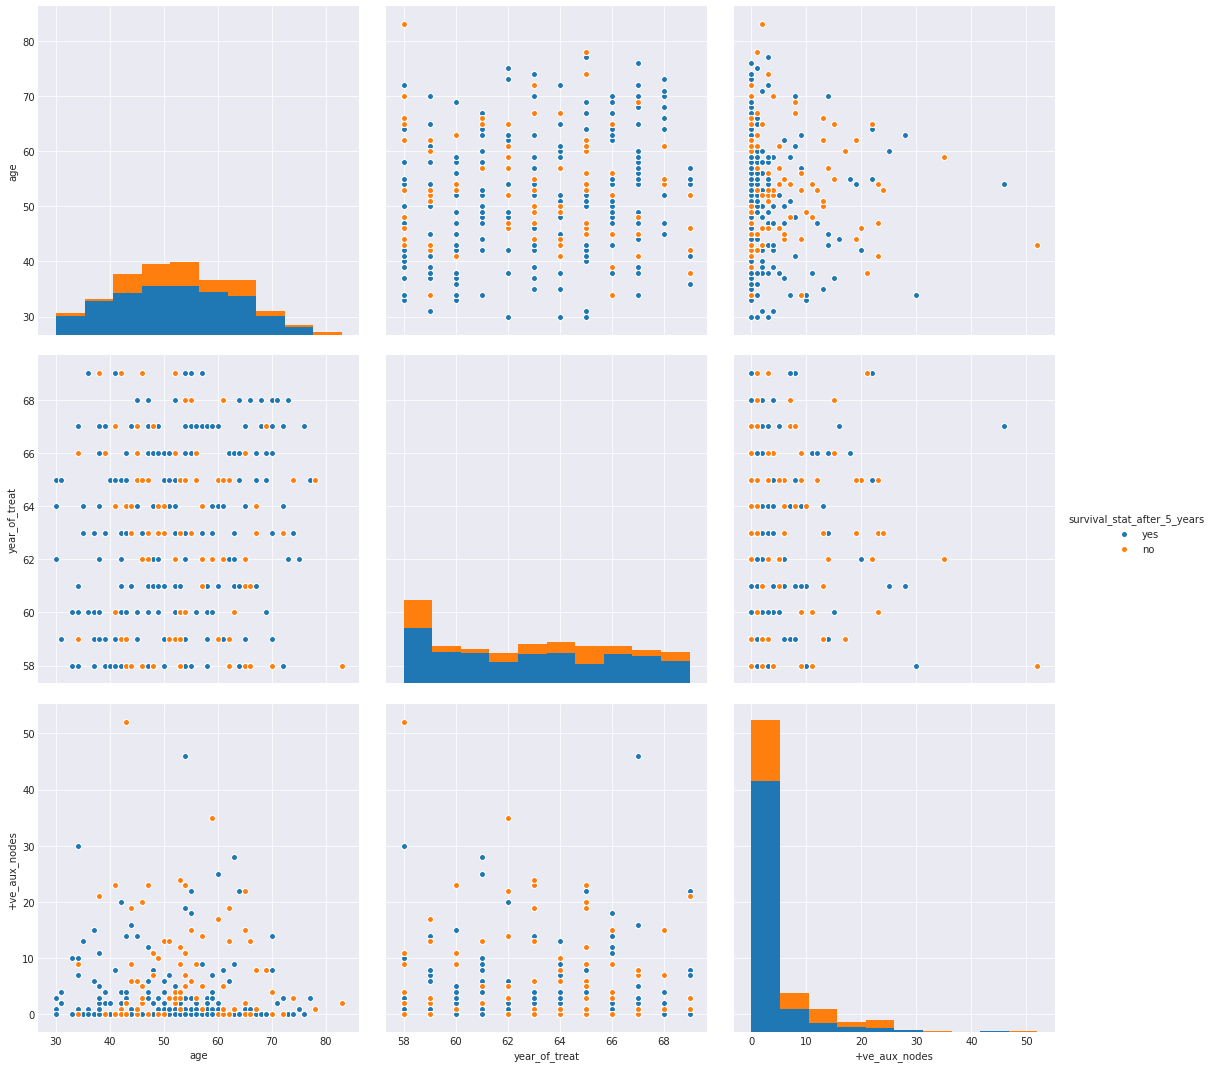

In [9]:
#Plotting Pair Plots all at once

plt.close();
sns.set_style('darkgrid');
sns.pairplot(habe, hue = 'survival_stat_after_5_years', size = 5)
plt.show()

# Observations

-  when we see plot between age vs +ve_aux_nodes,  probability  of patients survived in the age group (30 - 40) is very high. 
-  other plots are not that much useful, since they are crowded.


#######################################################################################################################

# Histograms and PDF

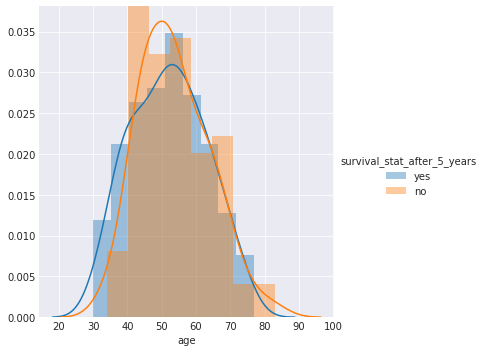

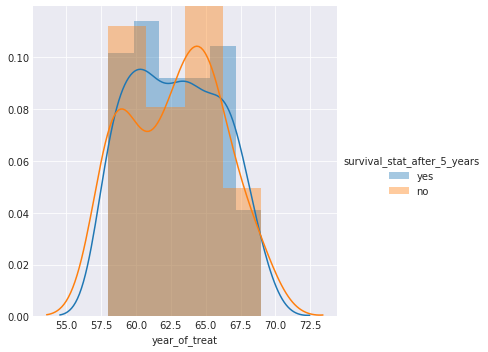

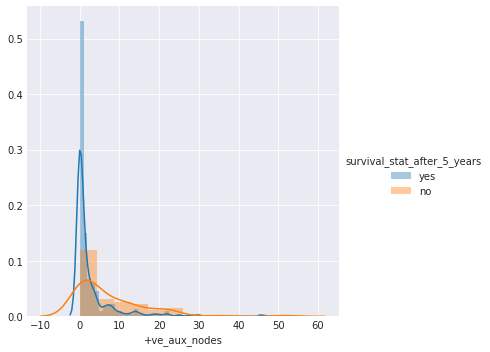

In [10]:
# Plotting Histograms and Probability Density Functions.

for idx, feature in enumerate(list(habe.columns)[:-1]):
    fg = sns.FacetGrid(habe, hue='survival_stat_after_5_years', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

# Observations

-  More percentage of people have survived in the age group (50 - 55)
-  More percentage of people have not survived in the age group (40 - 45)
-  More percentage of people have survived having operation in the year group (1960 - 1962.5)
-  Patients having (0 - 4) positive auxiliary nodes are having very high chances of survival after 5 years.


######################################################################################################################

# Box Plots : 

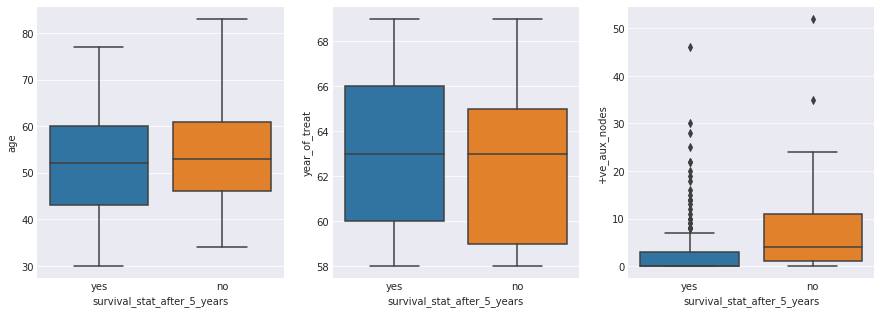

In [11]:
# Plotting Box Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(habe.columns)[:-1]):
    sns.boxplot( x='survival_stat_after_5_years', y=feature, data=habe, ax=axes[idx])
plt.show()

# Observations

-  many outliers are there in plot (+ve_aux_nodes VS survival_stat_after_5_years)
 

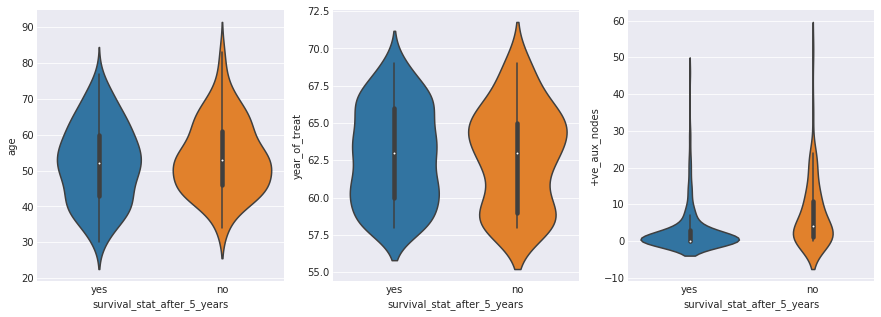

In [12]:
# Plotting Violin Plots

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(habe.columns)[:-1]):
    sns.violinplot( x='survival_stat_after_5_years', y=feature, data=habe, ax=axes[idx])
plt.show()

# Observations

-  Plot of (survival_stat_after_5_years VS +ve_aux_nodes) is very denser in the range of (0 - 4) positive auxiliary nodes
i,e more number of patients who have survived are having (0 - 4) positive auxiliary nodes

######################################################################################################################

# Cumulative Distributive Frequency Plot (CDF) and Probability Density Function Plot (PDF)

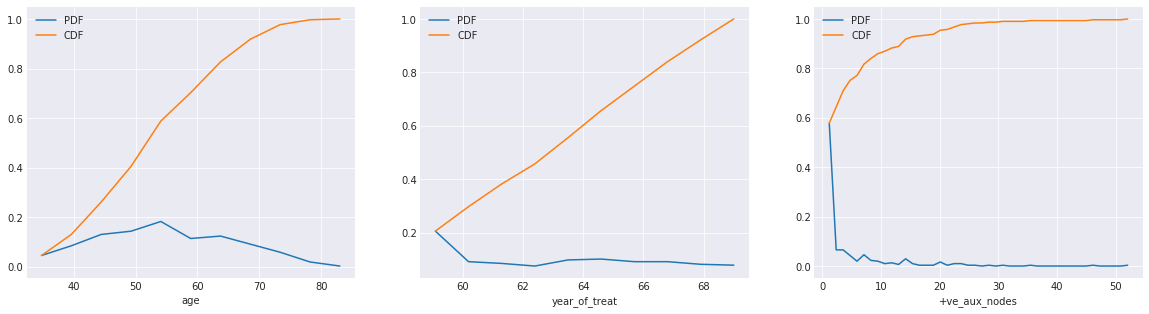

In [13]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(habe.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    counts, bin_edges = np.histogram(habe[feature], bins='auto', density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    pdfP, = plt.plot(bin_edges[1:], pdf)
    cdfP, = plt.plot(bin_edges[1:], cdf)
    plt.legend([pdfP, cdfP], ["PDF", "CDF"])    
    plt.xlabel(feature)

# Observations

-  in this plot we can see cdf as well as pdf (orange line is cdf, blue line is pdf).
-  age plot is like close to gaussian curve obviously as its a small dataset.
-  there are 80 percent of patients who are having less than or equal to 8 positive auxiliary nodes and they haven't survived.

#######################################################################################################################

# Conclusions

-  min age of a patient is 30yrs and max is 83yrs, mean age is 52.45 yrs
-  min number of positive auxiliary nodes in patient is 0.00 and max is 52.00
-  75th percentile lies at 4.00 in +ve auxiliary nodes column, so we can say 75 percent of patients are having less than                   or equal to 4 positive auxiliary nodes
-  similarly with year of treatment, 75 percent of patients having operation before 1965 to 1966 (since 75th percentile       lies at 65.75 in year_of_treat column)
-  This study is conducted on 306 patients


# References :

-  https://medium.com/@gokulkarthikk/habermans-cancer-survival-visual-exploratory-data-analysis-using-python-e7dcb7ac01ed